In [1]:
#Importing required libraries
import pandas as pd
import numpy as np
from sklearn import linear_model
from numpy import std
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
from numpy import mean
from numpy import sqrt
from sklearn.model_selection import LeaveOneOut
from numpy import absolute

In [2]:
#dataset_dir = 'TG2022_Datos\Departamentos_CSV\\vulnerabilidad_all_municipalities.csv' #Se carga el dataset
dataset_dir = 'TG2022_Datos\Departamentos_CSV\Dataset_FINAL_viv_hog_fall_per.csv' #Se carga el dataset
df_dataset = pd.read_csv(dataset_dir, sep=(',')) #Se lee el archivo csv el cual está separado por comas
df_dataset = df_dataset.sort_values(['U_DPTO','U_MPIO'],ascending=True)
df_dataset

U_DPTO  U_MPIO   Nom_DPTO    CASA    APTO  TIP_CUARTO  VIV_TRAD_INDIG  \
11         5       1  Antioquia  355252  514187       22005              70   
12         5       2  Antioquia    7891     522          92               1   
13         5       4  Antioquia     883     118          54               0   
14         5      21  Antioquia    1431     690          33               0   
15         5      30  Antioquia    7892    3572         167               1   
...      ...     ...        ...     ...     ...         ...             ...   
1117      97     889     Vaupes      88       0           1               4   
1118      99       1    Vichada    4767     997         456             533   
1119      99     524    Vichada    3096      71         129              13   
1120      99     624    Vichada    1103       4          15               4   
1121      99     773    Vichada    5909      91         119            3273   

      VIV_TRAD_ETNICA  OTRA_VIV   1-DOR  ...  Tecnica_Profesional  \
11                 94      1313  205922  ...               245278   
12                  0         7    2292  ...                  433   
13                  0         2     253  ...                  107   
14                  0         3     476  ...                  214   
15                  0        15    2749  ...                 1600   
...               ...       ...     ...  ...                  ...   
1117                0         6      48  ...                    5   
1118               21       132    2873  ...                 1322   
1119                1        31    1307  ...                  393   
1120                0        16     440  ...                  126   
1121               66        52    6244  ...                  464   

      Universitario  Posgrado  Ninguno  No_inf_escolaridad  \
11           280569     82299    54515               35524   
12              304       149     1230                 143   
13               58        23       99                  27   
14              112        28      166                  43   
15              792       189     1400                 128   
...             ...       ...      ...                 ...   
1117              3         0       17                  43   
1118           1032       380     1927                 767   
1119            272        83      699                 265   
1120            145        34      267                  44   
1121            301        76     3981                2581   

      No Aplica P_NIVEL_ANOSR  No informa ingresos  Recibe ingresos  \
11                     122409                38570          1155530   
12                        923                  235             7220   
13                        131                   32              819   
14                        253                   66             1456   
15                       1455                  235            11472   
...                       ...                  ...              ...   
1117                       38                   33               27   
1118                     2099                  298             5712   
1119                     1005                  102             2341   
1120                      376                   45              981   
1121                     6078                 1805             3302   

      No recibe ingresos  No Aplica ingresos  
11                914201              264029  
12                  8060                2084  
13                  1024                 284  
14                  1768                 549  
15                 11939                3175  
...                  ...                 ...  
1117                 262                 434  
1118                8894                4884  
1119                4446                2801  
1120                1847                1153  
1121               23009               15022  

[1122 rows x 88 columns]

In [3]:
dataset_dir = 'TG2022_Datos\Departamentos_CSV\\vulnerabilidad_all_municipalities.CSV' #Se carga el dataset
df_dataset_y = pd.read_csv(dataset_dir, sep=(',')) #Se lee el archivo csv el cual está separado por comas
df_dataset_y

COD_MPIO  CATEGORIA        ipm  Vulnerabilidad_numero
0         5001   3.593244  13.422913               1.901452
1         5002   1.180124  18.068011               2.149068
2         5004   0.928571   7.731809               1.571429
3         5021   1.714286  16.318095               2.142857
4         5030   0.539792   6.815579               0.892734
...        ...        ...        ...                    ...
1116     97889   0.000000   0.000000               0.000000
1117     99001   1.009780  29.488035               1.765281
1118     99524   1.047478  38.373385               1.581602
1119     99624   1.119565  37.955078               2.000000
1120     99773   0.603030  13.916857               0.669697

[1121 rows x 4 columns]

In [4]:
df_dataset_y = df_dataset_y.astype(str)

In [5]:
df_dataset_y["U_MPIO"] = df_dataset_y['COD_MPIO'].apply(lambda x: x[-3:])
df_dataset_y["U_DPTO"] = df_dataset_y['COD_MPIO'].apply(lambda x: x[:-3])
df_dataset_y

COD_MPIO           CATEGORIA                 ipm Vulnerabilidad_numero  \
0        5001  3.5932439977666117  13.422913176996094    1.9014517029592408   
1        5002  1.1801242236024845  18.068011442869565    2.1490683229813663   
2        5004  0.9285714285714286  7.7318091779761895    1.5714285714285714   
3        5021  1.7142857142857142      16.31809479125     2.142857142857143   
4        5030  0.5397923875432526   6.815579223768166    0.8927335640138409   
...       ...                 ...                 ...                   ...   
1116    97889                 0.0                 0.0                   0.0   
1117    99001  1.0097799511002443   29.48803530894621    1.7652811735941318   
1118    99524  1.0474777448071215  38.373385317448076    1.5816023738872405   
1119    99624  1.1195652173913044      37.95507800175                   2.0   
1120    99773  0.6030303030303029  13.916856676457574    0.6696969696969697   

     U_MPIO U_DPTO  
0       001      5  
1       002      5  
2       004      5  
3       021      5  
4       030      5  
...     ...    ...  
1116    889     97  
1117    001     99  
1118    524     99  
1119    624     99  
1120    773     99  

[1121 rows x 6 columns]

In [6]:
df_dataset_y.U_MPIO = df_dataset_y.U_MPIO.astype(int) 
df_dataset_y.U_DPTO = df_dataset_y.U_DPTO.astype(int)  
print(df_dataset_y.dtypes)
df_dataset_y =df_dataset_y.loc[:,["Vulnerabilidad_numero","U_MPIO","U_DPTO"]]
df_dataset_y

COD_MPIO                 object
CATEGORIA                object
ipm                      object
Vulnerabilidad_numero    object
U_MPIO                    int32
U_DPTO                    int32
dtype: object


Vulnerabilidad_numero  U_MPIO  U_DPTO
0       1.9014517029592408       1       5
1       2.1490683229813663       2       5
2       1.5714285714285714       4       5
3        2.142857142857143      21       5
4       0.8927335640138409      30       5
...                    ...     ...     ...
1116                   0.0     889      97
1117    1.7652811735941318       1      99
1118    1.5816023738872405     524      99
1119                   2.0     624      99
1120    0.6696969696969697     773      99

[1121 rows x 3 columns]

In [7]:
df_nuevo = df_dataset_y.merge(df_dataset, on=["U_MPIO","U_DPTO"], how="right")
df_nuevo

Vulnerabilidad_numero  U_MPIO  U_DPTO   Nom_DPTO    CASA    APTO  \
0       1.9014517029592408       1       5  Antioquia  355252  514187   
1       2.1490683229813663       2       5  Antioquia    7891     522   
2       1.5714285714285714       4       5  Antioquia     883     118   
3        2.142857142857143      21       5  Antioquia    1431     690   
4       0.8927335640138409      30       5  Antioquia    7892    3572   
...                    ...     ...     ...        ...     ...     ...   
1117                   0.0     889      97     Vaupes      88       0   
1118    1.7652811735941318       1      99    Vichada    4767     997   
1119    1.5816023738872405     524      99    Vichada    3096      71   
1120                   2.0     624      99    Vichada    1103       4   
1121    0.6696969696969697     773      99    Vichada    5909      91   

      TIP_CUARTO  VIV_TRAD_INDIG  VIV_TRAD_ETNICA  OTRA_VIV  ...  \
0          22005              70               94      1313  ...   
1             92               1                0         7  ...   
2             54               0                0         2  ...   
3             33               0                0         3  ...   
4            167               1                0        15  ...   
...          ...             ...              ...       ...  ...   
1117           1               4                0         6  ...   
1118         456             533               21       132  ...   
1119         129              13                1        31  ...   
1120          15               4                0        16  ...   
1121         119            3273               66        52  ...   

      Tecnica_Profesional  Universitario  Posgrado  Ninguno  \
0                  245278         280569     82299    54515   
1                     433            304       149     1230   
2                     107             58        23       99   
3                     214            112        28      166   
4                    1600            792       189     1400   
...                   ...            ...       ...      ...   
1117                    5              3         0       17   
1118                 1322           1032       380     1927   
1119                  393            272        83      699   
1120                  126            145        34      267   
1121                  464            301        76     3981   

      No_inf_escolaridad  No Aplica P_NIVEL_ANOSR  No informa ingresos  \
0                  35524                   122409                38570   
1                    143                      923                  235   
2                     27                      131                   32   
3                     43                      253                   66   
4                    128                     1455                  235   
...                  ...                      ...                  ...   
1117                  43                       38                   33   
1118                 767                     2099                  298   
1119                 265                     1005                  102   
1120                  44                      376                   45   
1121                2581                     6078                 1805   

      Recibe ingresos  No recibe ingresos  No Aplica ingresos  
0             1155530              914201              264029  
1                7220                8060                2084  
2                 819                1024                 284  
3                1456                1768                 549  
4               11472               11939                3175  
...               ...                 ...                 ...  
1117               27                 262                 434  
1118             5712                8894                4884  
1119             2341                4446                2801  
1120              981    

In [8]:
df_nuevo = df_nuevo.drop(['U_MPIO','U_DPTO','Nom_DPTO'], axis=1)

In [9]:
df_dataset_c = df_nuevo
print(df_dataset_c.dtypes)
df_dataset_c = df_dataset_c.fillna(0)

Vulnerabilidad_numero      object
CASA                        int64
APTO                        int64
TIP_CUARTO                  int64
VIV_TRAD_INDIG              int64
                            ...  
No Aplica P_NIVEL_ANOSR     int64
No informa ingresos         int64
Recibe ingresos             int64
No recibe ingresos          int64
No Aplica ingresos          int64
Length: 86, dtype: object


In [10]:
export_dir = 'TG2022_Datos/Departamentos_CSV/Dataset_Final_DANE.csv'
df_dataset_c.to_csv(export_dir, index=False, header=True)

La correlacion del dataframe es: 
                         Vulnerabilidad_numero      CASA      APTO  \
Vulnerabilidad_numero                 1.000000  0.042791  0.040629   
CASA                                  0.042791  1.000000  0.940157   
APTO                                  0.040629  0.940157  1.000000   
TIP_CUARTO                            0.027594  0.917825  0.973348   
VIV_TRAD_INDIG                       -0.061408  0.023215  0.000250   
...                                        ...       ...       ...   
No Aplica P_NIVEL_ANOSR               0.031266  0.972491  0.976476   
No informa ingresos                   0.026099  0.953110  0.990449   
Recibe ingresos                       0.038323  0.957567  0.996696   
No recibe ingresos                    0.036996  0.983311  0.978981   
No Aplica ingresos                    0.031037  0.974347  0.977206   

                         TIP_CUARTO  VIV_TRAD_INDIG  VIV_TRAD_ETNICA  \
Vulnerabilidad_numero      0.027594       -0.061408  

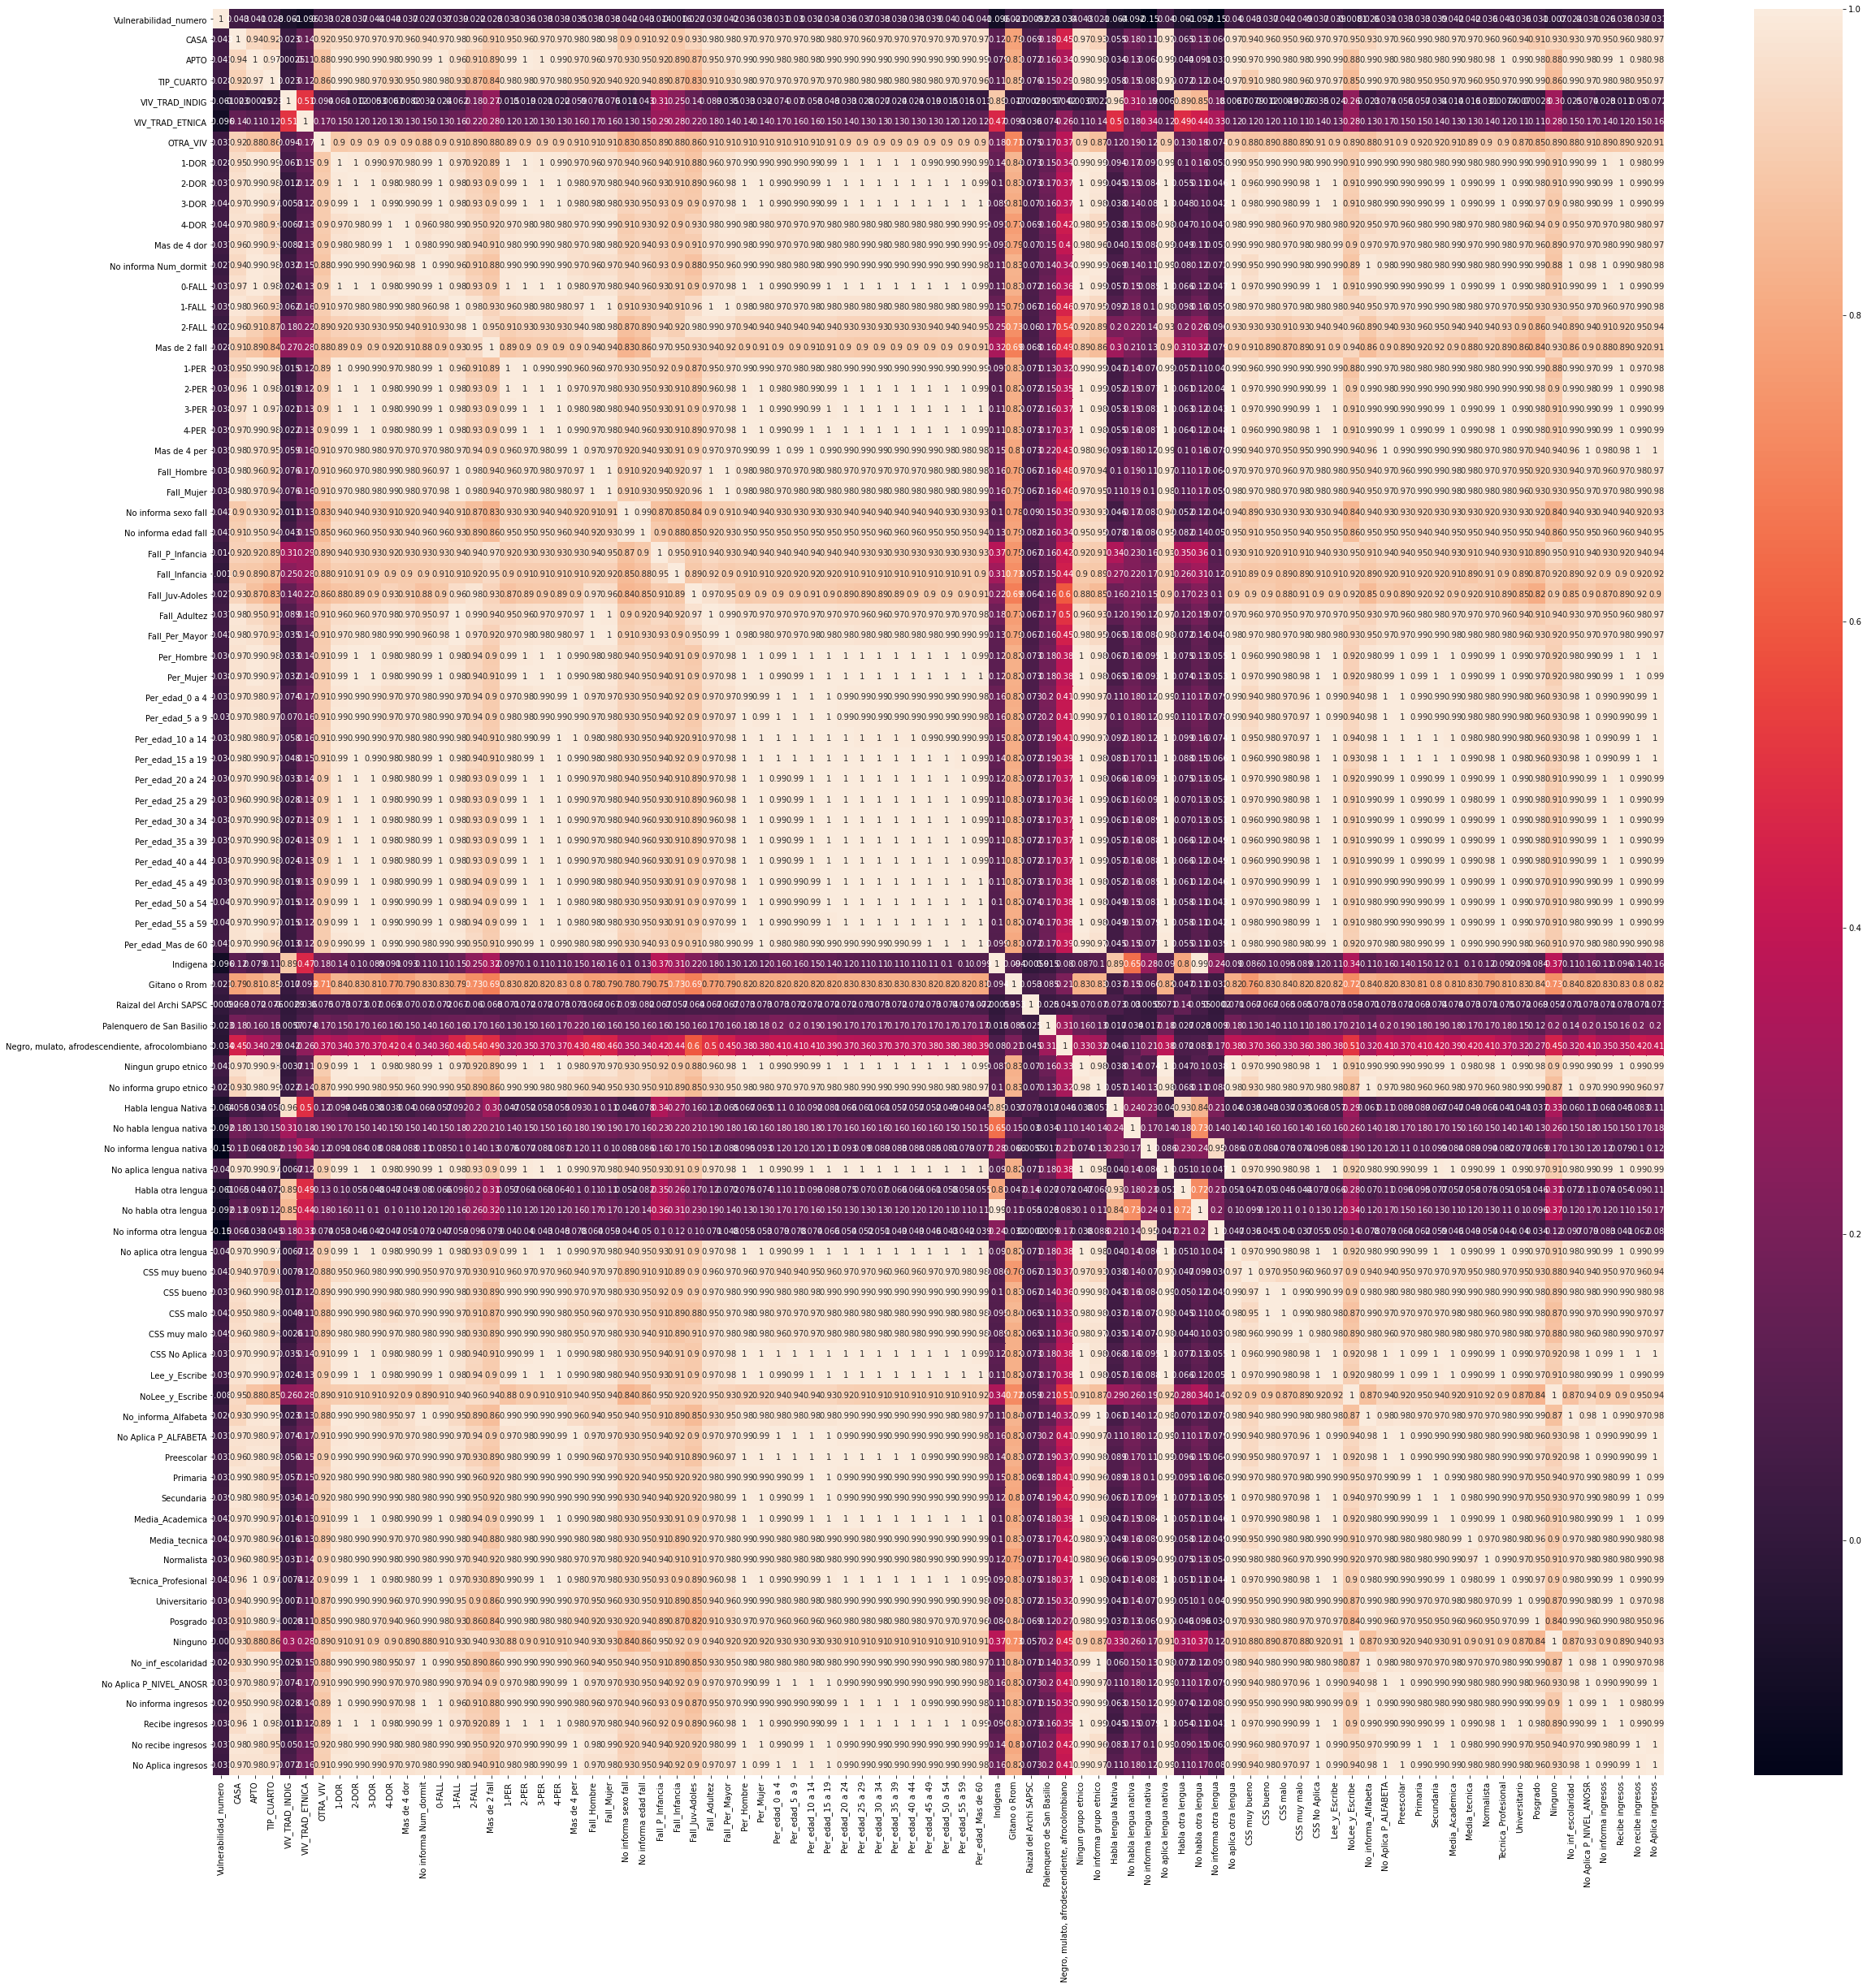

In [11]:
df_dataset_c.Vulnerabilidad_numero = df_dataset_c.Vulnerabilidad_numero.astype(float)
corr_df = df_dataset_c.corr(method="pearson")
print("La correlacion del dataframe es: ")
print(corr_df,"\n")
plt.figure(figsize=(40, 40))
sns.heatmap(corr_df, annot=True)
plt.show()

La correlacion del dataframe es: 
                         Vulnerabilidad_numero      CASA      APTO  \
Vulnerabilidad_numero                 1.000000 -0.072098  0.158541   
CASA                                 -0.072098  1.000000  0.789120   
APTO                                  0.158541  0.789120  1.000000   
TIP_CUARTO                            0.017178  0.801934  0.782190   
VIV_TRAD_INDIG                       -0.245118  0.437346  0.218605   
...                                        ...       ...       ...   
No Aplica P_NIVEL_ANOSR              -0.150290  0.905298  0.706132   
No informa ingresos                  -0.137314  0.867148  0.664201   
Recibe ingresos                      -0.055317  0.957528  0.835846   
No recibe ingresos                   -0.110910  0.949696  0.738004   
No Aplica ingresos                   -0.155796  0.903617  0.707154   

                         TIP_CUARTO  VIV_TRAD_INDIG  VIV_TRAD_ETNICA  \
Vulnerabilidad_numero      0.017178       -0.245118  

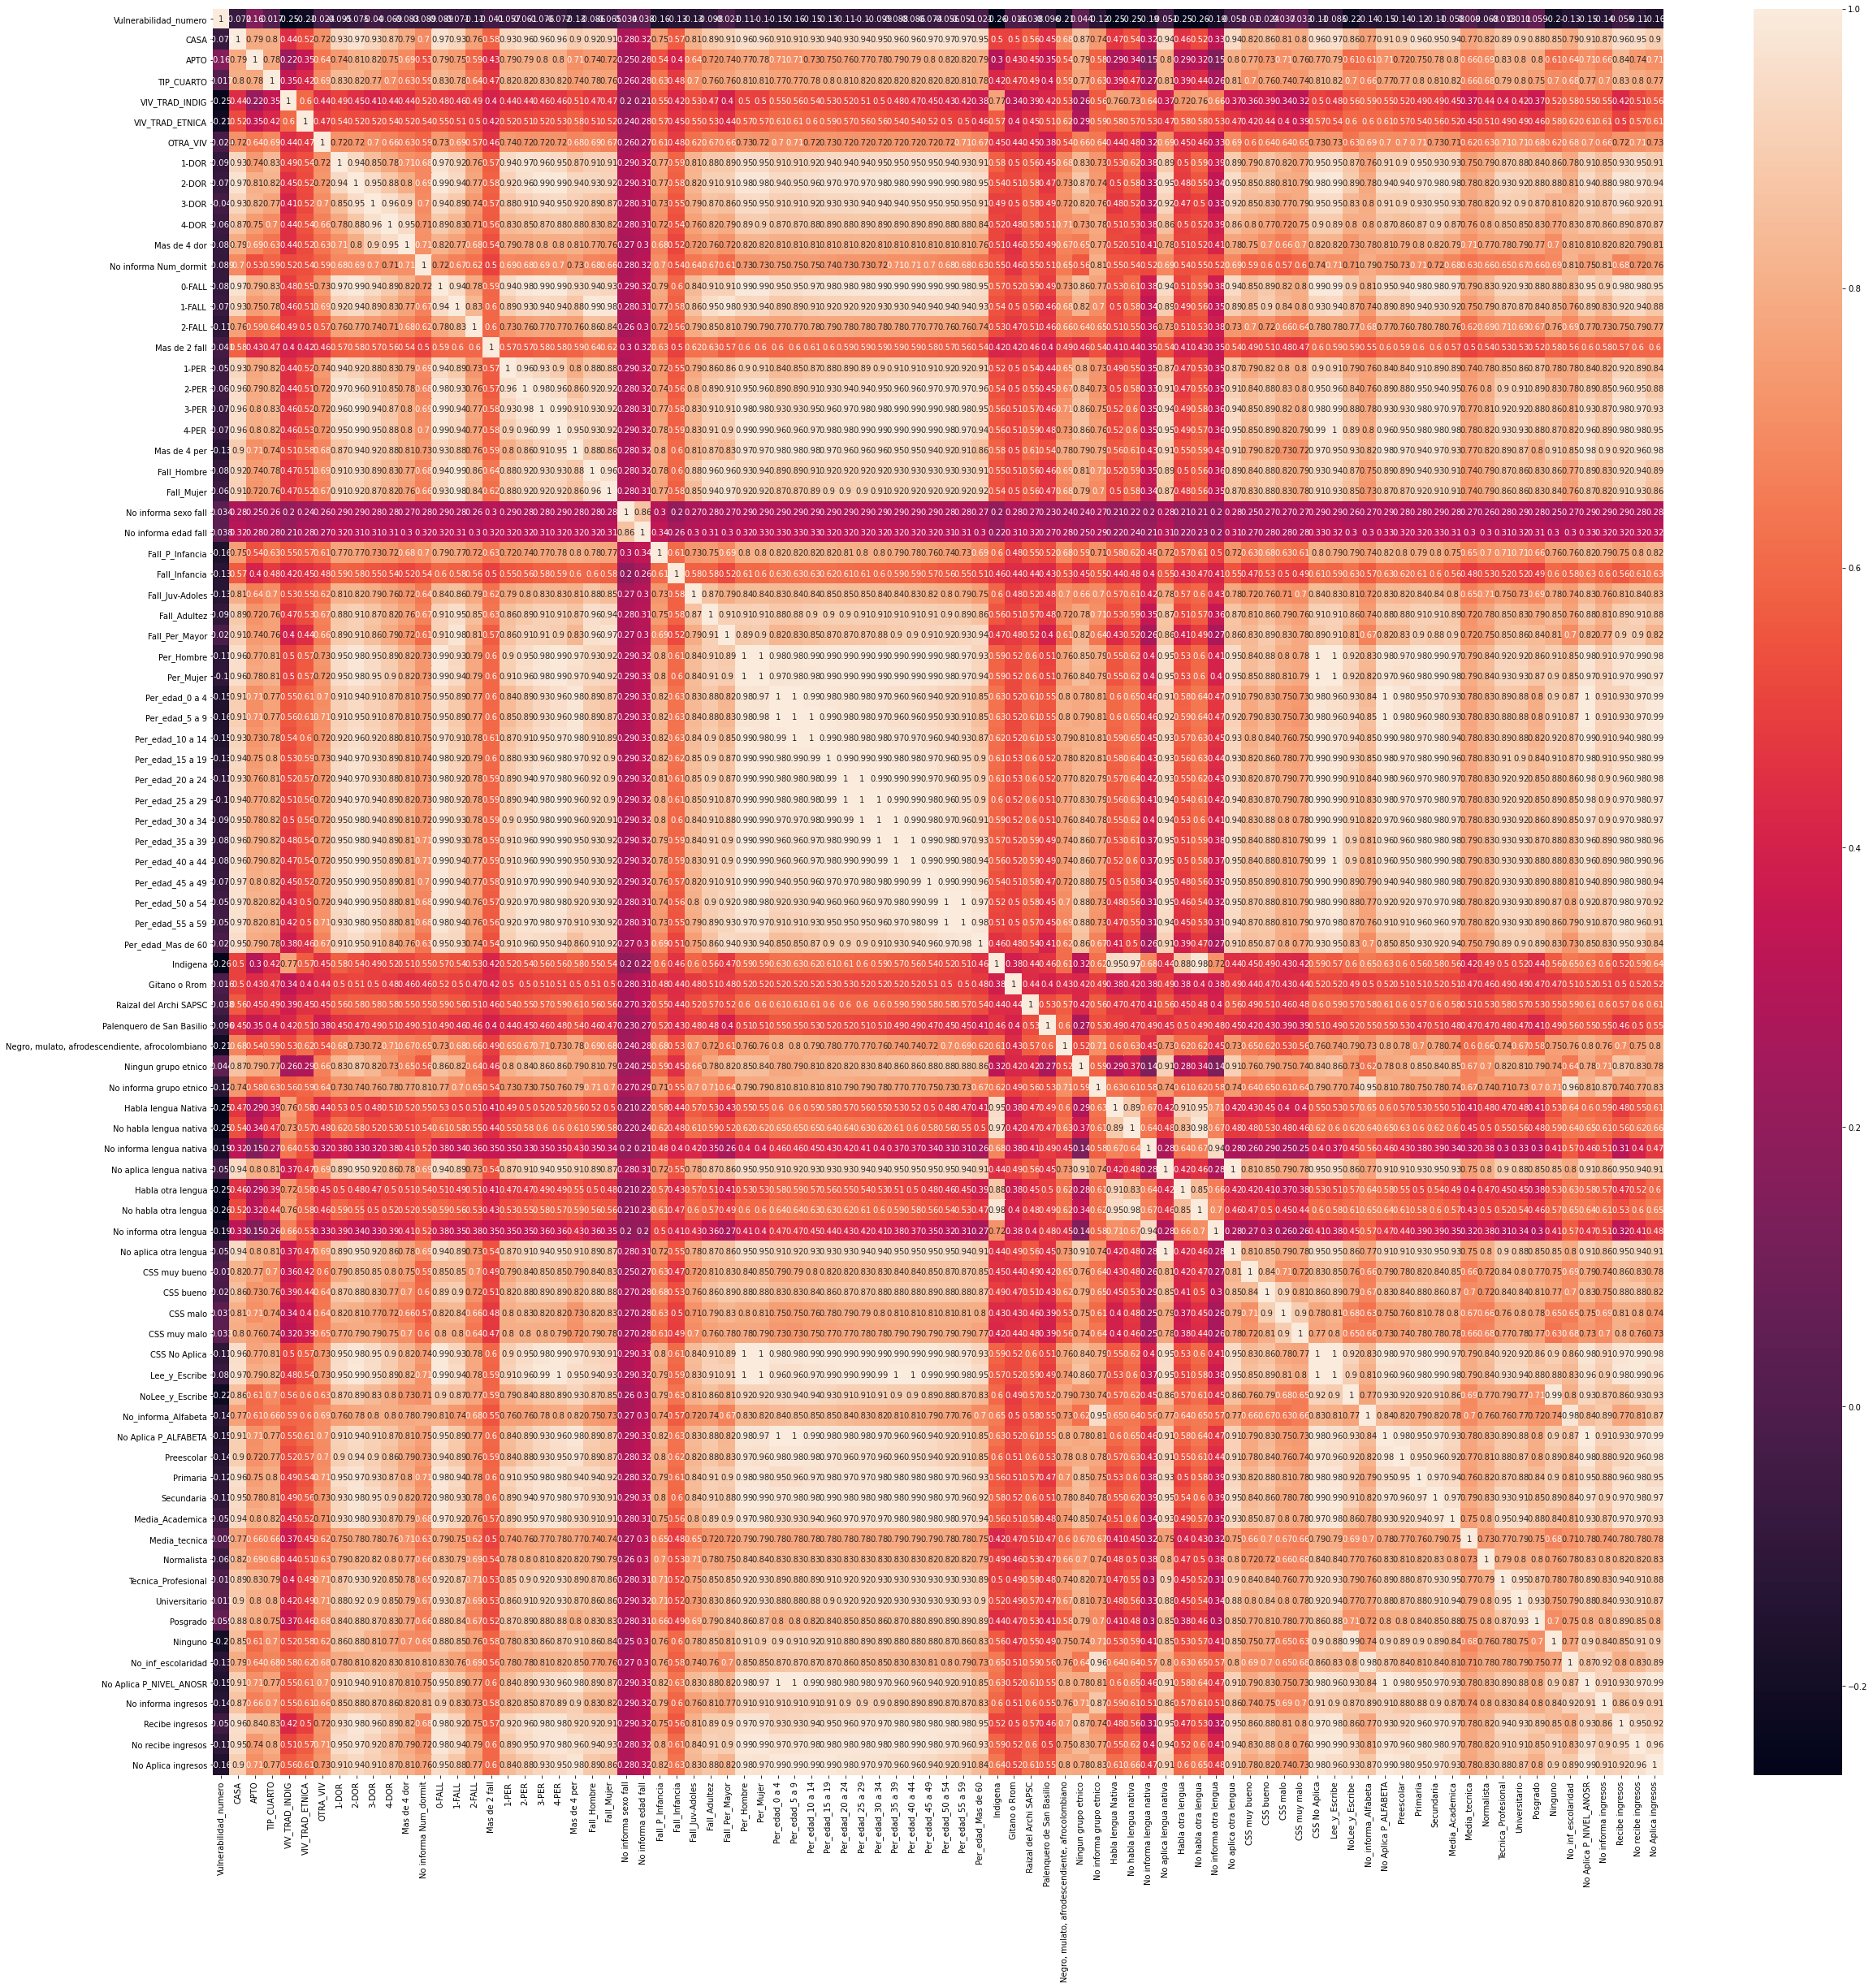

In [12]:
df_dataset_c.Vulnerabilidad_numero = df_dataset_c.Vulnerabilidad_numero.astype(float)
corr_df = df_dataset_c.corr(method="spearman")
print("La correlacion del dataframe es: ")
print(corr_df,"\n")
plt.figure(figsize=(40, 40))
sns.heatmap(corr_df, annot=True)
plt.show()

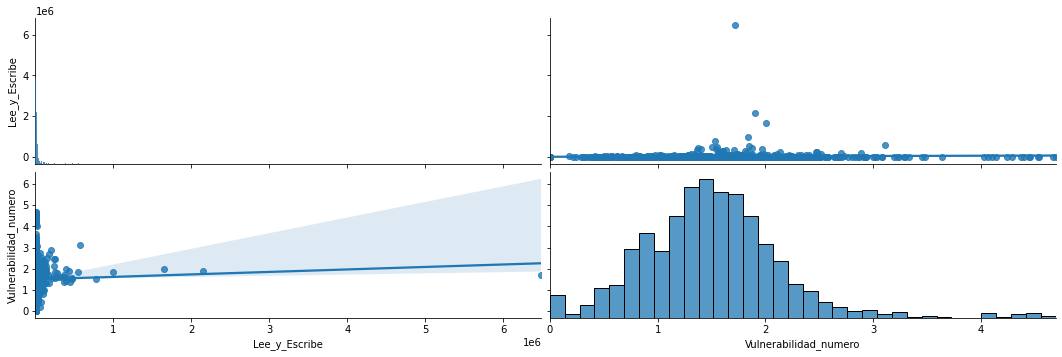

In [13]:
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
# conventional way to import seaborn
import seaborn as sns

# allow plots to appear within the notebook
%matplotlib inline

# visualize the relationship between the features and the response using scatterplots
#sns.pairplot(df_dataset_c, x_vars=["CASA","CASA","APTO","TIP_CUARTO","VIV_TRAD_INDIG","1-DOR","1-FALL","2-PER","Fall_Mujer","Per_edad_20 a 24","Indigena","Lee_y_Escribe"], y_vars='Vulnerabilidad_numero', size=20, aspect=1, kind='reg')
sns.pairplot(df_dataset_c, vars=["Lee_y_Escribe",'Vulnerabilidad_numero'],size=2.5, aspect=3, kind='reg')
plt.show()

In [14]:
y = df_dataset_c["Vulnerabilidad_numero"]
X = df_dataset_c.iloc[:,1:]

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3, random_state = 4)
modelo =  LinearRegression()
modelo.fit(X_train, Y_train)
y_pred = modelo.predict(X_test)
resultado = modelo.score(X_test, Y_test)
# compute the RMSE of our predictions
print("RMSE: ",(np.sqrt(mean_squared_error(Y_test, y_pred))))
print(std(y_pred)) # con esto vamos a ver cual es la precisión de nuestro modelo en porcentaje.
print("R2: ",r2_score(Y_test,y_pred))

RMSE:  0.713854158306303
0.5026760112728719
R2:  -0.2890274019666914


In [16]:
# Validación cruzada k fold
from sklearn.model_selection import KFold

# prepare the cross-validation procedure
cv = RepeatedKFold(n_splits=2, n_repeats=5, random_state=1)
modelo = LinearRegression()

kfold_validacion = KFold(n_splits=2, random_state=1, shuffle=True) # Acá indicamos cuantos fold queremos. En nuestro caso elegimos 10.and

In [20]:
scores = cross_val_score(modelo, X, y, cv = cv, n_jobs=-1)
print(scores)
print(Y_test)
rmse = mean_squared_error(
        y_true  = Y_test,
        y_pred  = scores,
        squared = False
       )

print('Accuracy: %.3f %.3f (%.3f) %.3f' % (std(scores), mean(scores), std(scores), r2_score(Y_test,y_pred))) # para ver el promedio de los resultados 

[ -30.9825967    -8.26588621  -57.88328676   -5.36309451 -202.80113992
   -0.62920304  -43.88040693   -0.5697267    -0.68968913   -2.78233897]
916     1.333333
695     1.178571
88      1.754717
978     0.972973
849     1.533333
          ...   
482     1.934010
36      2.189189
1022    1.568047
585     1.717949
726     1.242718
Name: Vulnerabilidad_numero, Length: 337, dtype: float64


ValueError: Found input variables with inconsistent numbers of samples: [785, 10]

In [18]:
scores = cross_val_score(modelo, X, y, cv = kfold_validacion, n_jobs=-1)
print('Accuracy: %.3f (%.3f) %.3f' % (mean(scores), std(scores), r2_score(Y_test,y_pred)))# para ver el promedio de los resultados 

Accuracy: -19.624 (11.358) -0.277


In [ ]:
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

alphas = np.array([1, 0.5, 0.2, 0.1, 0.05, 0.02, 0.01])
model = Lasso()
grid = GridSearchCV(estimator = model,
                    param_grid = dict(alpha = alphas),
                    cv = 3)
grid.fit(X, y)

In [ ]:
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV


param_grid = dict(alpha = uniform())

grid = RandomizedSearchCV(estimator=model,
                          param_distributions=dict(alpha = uniform()),
                          n_iter=100,
                          cv=3,
                          random_state=0)
                          
grid.fit(X, y)

In [ ]:
#define cross-validation method to use
cv = KFold(n_splits=3, random_state=1, shuffle=True)

#build multiple linear regression model
model = LinearRegression()

#use k-fold CV to evaluate model
scores = cross_val_score(model, X, y,
                         cv=cv, n_jobs=-1)


print("Metricas cross_validation", scores)
 
print("Media de cross_validation", scores.mean())
 
preds = model.predict(X_test)
 
score_pred = metrics.accuracy_score(Y_test, preds)
 
print("Metrica en Test", score_pred)

In [ ]:
#define cross-validation method to use
cv = LeaveOneOut()

#build multiple linear regression model
model = LinearRegression()

#use LOOCV to evaluate model
scores = cross_val_score(model, X, y,
                         cv=cv, n_jobs=-1)

#view mean absolute error
scores

In [ ]:
#Implementing cross validation
 
k = 5
kf = KFold(n_splits=k, random_state=None)
model = linear_model.LinearRegression()
 
acc_score = []

In [ ]:
for train_index , test_index in kf.split(X):
    X_train , X_test = X[train_index,:],X[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
     
    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)
    print(pred_values)
     
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k
 
print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
modelo =  LinearRegression()
modelo.fit(X_train, Y_train)
y_pred = modelo.predict(X_test)
y_pred

In [ ]:
score = r2_score(Y_test,y_pred)
print('r2 score es: ',score)
print('mean_sqrd_error es: ',mean_squared_error(Y_test,y_pred))
print('root_mean_squared error es: ',np.sqrt(mean_squared_error(Y_test,y_pred)))

In [ ]:
def get_model():
	model = LogisticRegression()
	return model
 
# evaluate the model using a given test condition
def evaluate_model(cv):
	# get the dataset
	X, y = get_dataset()
	# get the model
	model = get_model()
	# evaluate the model
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	# return scores
	return mean(scores), scores.min(), scores.max()
 
# calculate the ideal test condition
ideal, _, _ = evaluate_model(LeaveOneOut())
print('Ideal: %.3f' % ideal)
# define folds to test
folds = range(2,31)
# record mean and min/max of each set of results
means, mins, maxs = list(),list(),list()
# evaluate each k value
for k in folds:
	# define the test condition
	cv = KFold(n_splits=k, shuffle=True, random_state=1)
	# evaluate k value
	k_mean, k_min, k_max = evaluate_model(cv)
	# report performance
	print('> folds=%d, accuracy=%.3f (%.3f,%.3f)' % (k, k_mean, k_min, k_max))
	# store mean accuracy
	means.append(k_mean)
	# store min and max relative to the mean
	mins.append(k_mean - k_min)
	maxs.append(k_max - k_mean)